In [12]:
import sqlite3
import pandas as pd 
import matplotlib.pyplot as plt

In [15]:
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

In [16]:
cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    date TEXT,
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")

In [17]:
sales_data = [
    ('2025-04-01', 'Coffee', 10, 2.5),
    ('2025-04-01', 'Tea', 5, 1.5),
    ('2025-04-02', 'Coffee', 7, 2.5),
    ('2025-04-02', 'Sandwich', 3, 5.0),
    ('2025-04-03', 'Tea', 8, 1.5),
    ('2025-04-03', 'Sandwich', 4, 5.0)
]

cursor.executemany("INSERT INTO sales (date, product, quantity, price) VALUES (?, ?, ?, ?)", sales_data)
conn.commit()
conn.close()


In [18]:
conn = sqlite3.connect("sales_data.db")

In [19]:
query = """
SELECT 
    product, 
    SUM(quantity) AS total_qty, 
    SUM(quantity * price) AS revenue 
FROM 
    sales 
GROUP BY 
    product
"""

In [20]:
df = pd.read_sql_query(query, conn)
conn.close()

In [21]:
print("Sales Summary:")
print(df)

Sales Summary:
    product  total_qty  revenue
0    Coffee         34     85.0
1  Sandwich         14     70.0
2       Tea         26     39.0


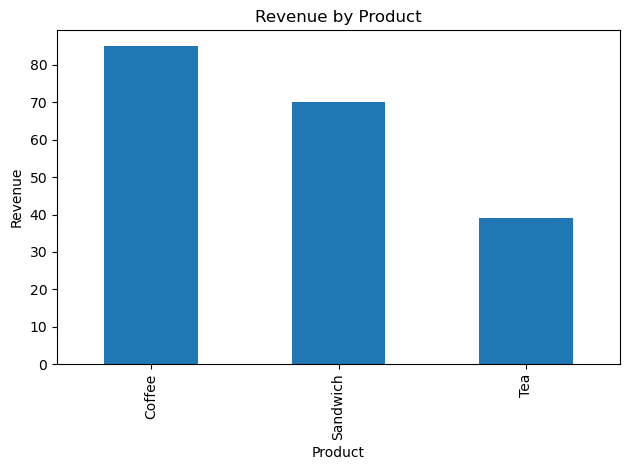

In [22]:
df.plot(kind='bar', x='product', y='revenue', legend=False)
plt.title('Revenue by Product')
plt.xlabel('Product')
plt.ylabel('Revenue')
plt.tight_layout()

# Optional: Save chart
plt.savefig("sales_chart.png")
plt.show()